In [2]:

# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('/content/news_articles.csv')

In [5]:
# Preprocessing function
def preprocess_text(text):
    # Remove non-alphabetical characters and lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize and remove stop words and apply stemming
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if not word in set(stopwords.words('english'))]
    return ' '.join(text)

In [6]:
# Ensure all values in the 'text' column are strings
df['text'] = df['text'].astype(str)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [7]:
# Prepare features and labels
X = df['cleaned_text']
y = df['label'].apply(lambda x: 1 if x == 'Real' else 0)  # 1 for Real, 0 for Fake

In [8]:
# Vectorize the text
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(X).toarray()

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Train Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Train AdaBoost with corrected parameter name
ada_classifier = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
ada_classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [13]:
# Make predictions with the Decision Tree model
y_pred_dt = dt_classifier.predict(X_test)

# Make predictions with the AdaBoost model
y_pred_ada = ada_classifier.predict(X_test)

# Now calculate the accuracy for both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")
print(f"AdaBoost Accuracy: {accuracy_ada * 100:.2f}%")


Decision Tree Accuracy: 69.52%
AdaBoost Accuracy: 76.57%


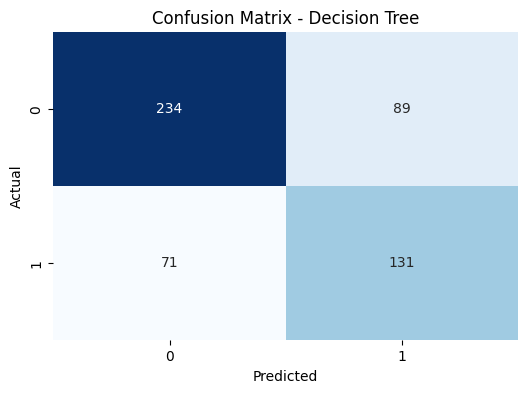

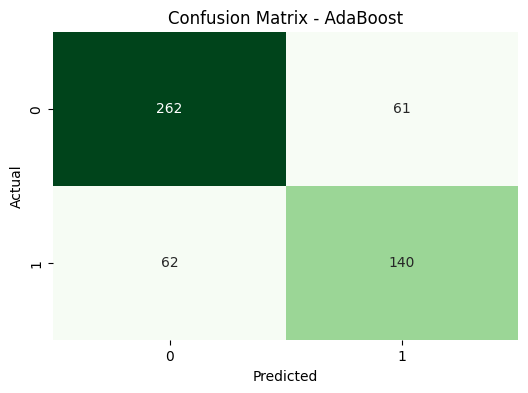

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for AdaBoost
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6,4))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<ipython-input-15-fc671f0ac577>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


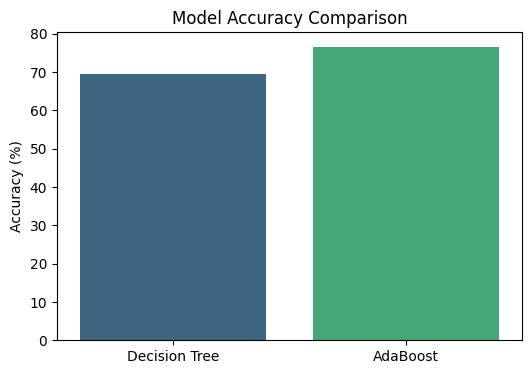

In [15]:
# Bar plot comparing accuracies
model_names = ['Decision Tree', 'AdaBoost']
accuracies = [accuracy_dt * 100, accuracy_ada * 100]

plt.figure(figsize=(6,4))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.show()


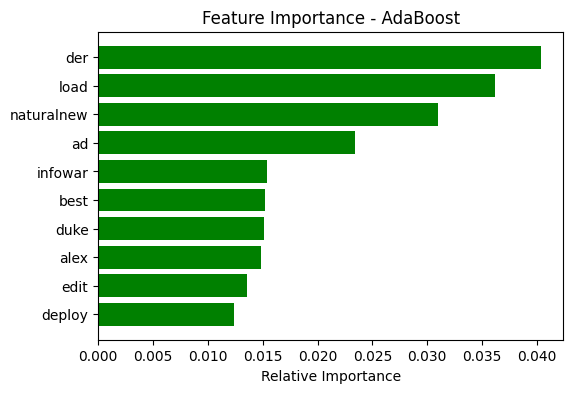

In [16]:
# Plotting feature importance for AdaBoost model
import numpy as np

# Get feature importances
importances = ada_classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 important features

plt.figure(figsize=(6,4))
plt.title("Feature Importance - AdaBoost")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [17]:
from sklearn.metrics import classification_report

# Display classification report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Display classification report for AdaBoost
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_ada))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       323
           1       0.60      0.65      0.62       202

    accuracy                           0.70       525
   macro avg       0.68      0.69      0.68       525
weighted avg       0.70      0.70      0.70       525

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       323
           1       0.70      0.69      0.69       202

    accuracy                           0.77       525
   macro avg       0.75      0.75      0.75       525
weighted avg       0.77      0.77      0.77       525



In [18]:
# Function to classify new input news
def classify_news(news):
    processed_news = preprocess_text(news)
    vectorized_news = vectorizer.transform([processed_news]).toarray()
    prediction_dt = dt_classifier.predict(vectorized_news)[0]
    prediction_ada = ada_classifier.predict(vectorized_news)[0]

    result_dt = 'Real' if prediction_dt == 1 else 'Fake'
    result_ada = 'Real' if prediction_ada == 1 else 'Fake'

    print(f"Decision Tree Prediction: {result_dt}")
    print(f"AdaBoost Prediction: {result_ada}")


In [ ]:
# Test input
news_input = input("Enter news text to classify: ")
classify_news(news_input)